# Stroke

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## 1. Load the data

In [2]:
#get the data from google classroom
#kaggle competition
df = pd.read_csv("../data/brain_stroke.csv")

In [3]:
df.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

### Balance the class

In [4]:
#1. set the cond = Y, and cond = N
cond0 = df.stroke == 0  #to 0 or 1
cond1 = df.stroke == 1

df_0 = df[cond0].sample(n=248, random_state=999)
df_1 = df[cond1] #also 192

#3. concat these two dfs
df = pd.concat([df_0, df_1])

df.stroke.value_counts()


0    248
1    248
Name: stroke, dtype: int64

### Label encoding

This is a useful step to do before EDA, so that categories are turned into numbers.


In [5]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [7]:
#gender = 2
#ever_married = 2
#work_type = got nan!!
#Residence_type = got 2 + nan
#smoking_status = 4

In [8]:
df.gender.unique(), df.ever_married.unique(), df.Residence_type.unique()

(array(['Male', 'Female'], dtype=object),
 array(['Yes', 'No'], dtype=object),
 array(['Urban', 'Rural', nan], dtype=object))

In [9]:
df.Residence_type.value_counts()

Urban    271
Rural    221
Name: Residence_type, dtype: int64

In [10]:
#do label encoding the Loan Status
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])

In [11]:
df.gender.unique(), df.ever_married.unique(), df.Residence_type.unique()
#I need to remember to clean up the 2 for Residence_type!!!

(array([1, 0]), array([1, 0]), array([1, 0, 2]))

In [12]:
df.Residence_type.value_counts()

1    271
0    221
2      4
Name: Residence_type, dtype: int64

### One hot encoding

In [13]:
df.work_type.unique()

array(['Self-employed', 'children', 'Private', 'Govt_job', nan],
      dtype=object)

In [14]:
df.smoking_status.unique()

array(['formerly smoked', 'Unknown', 'smokes', 'never smoked'],
      dtype=object)

In [15]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])

In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2045,1,69.0,0,0,1,1,78.48,25.8,0,0,0,1,0,0,1,0,0
3960,0,10.0,0,0,0,1,77.43,16.2,0,0,0,0,1,1,0,0,0
3858,0,47.0,0,0,1,0,115.98,27.6,0,0,1,0,0,1,0,0,0
393,1,13.0,0,0,0,0,55.39,23.2,0,0,0,0,1,1,0,0,0
2324,1,62.0,0,0,1,0,59.61,32.5,0,0,1,0,0,1,0,0,0


## 2. EDA (Exploratory Data Analysis)

In [17]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [18]:
import seaborn as sns

#1. You want to divide into categorical and numerical columns using select_dtypes
df.dtypes
num_col = df.select_dtypes(include=['int64', 'float64'])
# numcol = numcol.drop([]) #Loan_Status
cat_col = df.select_dtypes(exclude=['int64', 'float64'])
num_col.columns, cat_col.columns

(Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
        'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
       dtype='object'),
 Index(['work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
        'work_type_children', 'smoking_status_Unknown',
        'smoking_status_formerly smoked', 'smoking_status_never smoked',
        'smoking_status_smokes'],
       dtype='object'))

### Bar plots

In [19]:
#2. for numerical type, lets plot some a bar plot with Loan Status
# for col in num_col.columns:
#     plt.figure(figsize=(3, 2))
#     if col != 'stroke':
        # sns.barplot(x = df['stroke'], y = df[col])
        # plt.show()
        
#so age, hypertension, heart_disease, ever_married, avg_glucose_level, 

### Countplot / Histogram

In [20]:
#3. for categorial type, you may want to use countplot with Loan Status
# for col in cat_col.columns:
#     plt.figure(figsize=(3, 2))
#     sns.countplot(x = df[col], hue = df['stroke'])
#     #similar to hue in scatterplot
#     plt.show()
    # sns.countplot()  #because categorical, you need to count, not simply use the magnitude...so cannot use bar...
    
#work_type_self_employed, children, unknown, formerly smoked, 

### Correlation matrix

In [21]:
# plt.figure(figsize=(10, 12))
# sns.heatmap(df.corr(), annot=True)  #this is only for numeric values....
#same trend as plots above

### Predictive Power Score

In [22]:
# import ppscore as pps

# # before using pps, let's drop country and year
# dfcopy = df.copy()

# #this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
# matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# #plot
# plt.figure(figsize = (15,8))
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

# same trend as above

## 3. Feature Engineering

Skipped

## 4. Feature Selection

Since our dataset is already splitted at the dataset level, thus we do not need to hurry to select the features.  We can preprocess and then select later.

#forward selection - process of starting with one feature, and slowly adding one feature at a time, until the performance does not improve by certain threshold you want.

In [23]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [24]:
#work_type_self_employed, children, unknown, formerly smoked, 
#so age, hypertension, heart_disease, ever_married, avg_glucose_level, 

X = df[ ['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked']]
y = df[ ['stroke']]

In [25]:
X.shape

(496, 8)

In [26]:
y.shape

(496, 1)

In [27]:
y = y.stack()

In [28]:
y.shape

(496,)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Preprocessing

### Null values

In [30]:
#1. please check the missing value in df_train, and of course df_test
X_train.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 3
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
dtype: int64

In [31]:
X_train['avg_glucose_level'].fillna(X_train['avg_glucose_level'].median(), inplace=True)

In [32]:
X_train.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
avg_glucose_level                 0
work_type_Self-employed           0
work_type_children                0
smoking_status_formerly smoked    0
dtype: int64

In [33]:
y_test.isna().sum()

0

In [34]:
y_train.isna().sum()

0

### Scaling

In [35]:
X_train.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,work_type_Self-employed,work_type_children,smoking_status_formerly smoked
3798,3.0,0,0,0,107.52,0,1,0
4806,71.0,0,1,1,81.76,0,0,0
106,82.0,0,0,1,200.59,0,0,1
393,13.0,0,0,0,55.39,0,1,0
149,61.0,1,1,1,112.24,0,0,0


In [36]:
from sklearn.preprocessing import StandardScaler

col_names = ['age', 'avg_glucose_level']

sc = StandardScaler()
X_train[['age']] = sc.fit_transform(X_train[['age']])
X_test[['age']]  = sc.transform(X_test[['age']])

X_train[['avg_glucose_level']] = sc.fit_transform(X_train[['avg_glucose_level']])
X_test[['avg_glucose_level']]  = sc.transform(X_test[['avg_glucose_level']])

## 6. Modeling

In [37]:
#3. perform cross validation with a selected set of models, to scope down which model is among the best
from sklearn.linear_model import LogisticRegression  #drawing a line based on linear regression but used for classification
from sklearn.naive_bayes import GaussianNB  #drawing a line based on probability
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier  #using trees to classify
from sklearn.svm import SVC  #drawing a line based on maximum distance
from sklearn.ensemble import GradientBoostingClassifier  #<<-------is the MOST complex

lr = LogisticRegression(random_state=999)
rf = RandomForestClassifier(random_state=999)
sv = SVC(random_state=999)

models = [lr, rf, sv]

#3.2 perform cross validation using KFold
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state=999)

for model in models:
    score = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')  #f1, recall, precision, accuracy
    print("Scores: ", score, "- Scores mean: ", score.mean(), "- Scores std (lower better): ", score.std())  #out of 1 ; 1 means perfect accuracy
    #lr, rf, sv

Scores:  [0.71428571 0.71428571 0.86956522 0.7826087  0.71014493] - Scores mean:  0.7581780538302277 - Scores std (lower better):  0.061909954981361315
Scores:  [0.7        0.71428571 0.82608696 0.72463768 0.72463768] - Scores mean:  0.7379296066252589 - Scores std (lower better):  0.04499501663442325
Scores:  [0.7        0.7        0.85507246 0.76811594 0.75362319] - Scores mean:  0.7553623188405796 - Scores std (lower better):  0.05698730591172623


In [38]:
#4. grid search to find the best version of that model
#remind you: grid search is BASICALLY same as cross validation but for the same model

from sklearn.model_selection import GridSearchCV

model = LogisticRegression(random_state=999)  #<----this is the model I choose, after cross validation

param_grid = dict()
param_grid['solver'] = ['newton-cg', 'lbfgs', 'liblinear']  #this is listed in the sklearn website

#add more parameters here
#param_grid[parameter] = list of parameters to search

#refit means it will pick the best model, and fit again, so it means grid is already the best model after this line
grid = GridSearchCV(model, param_grid, scoring="accuracy", cv=kfold, refit=True, return_train_score=True)
#scoring = f1, recall, precision, accuracy

#fit the grid, which will basically do cross validation across all combinatiosn, here we only have 3 comb
grid.fit(X_train, y_train)  #remember to use only training set here....

#print the best parameters and accuracy
# print(grid.best_params_)
# print(grid.best_score_)
print(grid.cv_results_)

#this score is cross-validation score, basically the accuracy/precision/etc on the validation set


{'mean_fit_time': array([0.00391483, 0.00235319, 0.001333  ]), 'std_fit_time': array([1.23690949e-03, 1.10043644e-04, 3.62904092e-05]), 'mean_score_time': array([0.0011909 , 0.00076127, 0.00073204]), 'std_score_time': array([6.93481134e-04, 5.23499014e-05, 4.84586217e-05]), 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'liblinear'],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'solver': 'newton-cg'}, {'solver': 'lbfgs'}, {'solver': 'liblinear'}], 'split0_test_score': array([0.71428571, 0.71428571, 0.71428571]), 'split1_test_score': array([0.71428571, 0.71428571, 0.71428571]), 'split2_test_score': array([0.86956522, 0.86956522, 0.86956522]), 'split3_test_score': array([0.7826087, 0.7826087, 0.7826087]), 'split4_test_score': array([0.71014493, 0.71014493, 0.71014493]), 'mean_test_score': array([0.75817805, 0.75817805, 0.75817805]), 'std_test_score': array([0.06190995, 0.06190995, 0.06190995]), 'rank_test_score': array([

## 7. Testing

In [39]:
from sklearn.metrics import classification_report

pred_y = grid.predict(X_test)

print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        76
           1       0.72      0.84      0.77        73

    accuracy                           0.76       149
   macro avg       0.77      0.76      0.76       149
weighted avg       0.77      0.76      0.76       149



## 8. Analysis: Feature Importance

- Basically understanding which features are important for prediction
- Different algorithms have different way for feature importance
- For Logistic Regression, similar to Linear Regression, you can look at the coeffients/weights/slope

In [40]:
grid.best_estimator_

LogisticRegression(random_state=999, solver='newton-cg')

In [41]:
grid.best_estimator_.coef_

array([[ 1.84188873,  0.37672062,  0.61184302,  0.06967222,  0.11049916,
        -0.48942809,  0.31446832,  0.30232242]])

<Axes: ylabel='features'>

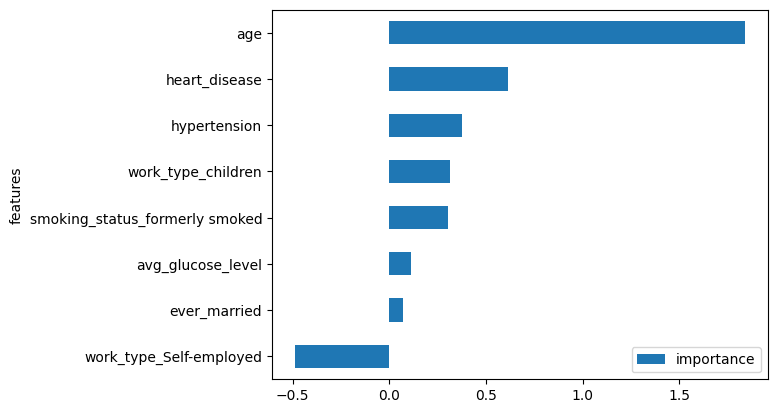

In [42]:
feature_importance = pd.DataFrame(['age', 'hypertension', 'heart_disease', 'ever_married', 'avg_glucose_level', 'work_type_Self-employed', 'work_type_children', 'smoking_status_formerly smoked'], 
                                  columns=['features'])
feature_importance["importance"] = grid.best_estimator_.coef_[0]

feature_importance = feature_importance.sort_values(by = ['importance'], ascending=True)

feature_importance.plot.barh(x='features', y='importance')

## 9. Inference

In [43]:
#do by yourself!!